#Statistics 72556 Homework #2
Written by Raafi Rahman in Google Colab

## Chapter 14 Problem 10

Use transfer learning for large image classification, going through these steps:

#### Libraries and helper functions

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from sklearn.model_selection import train_test_split

#try:
#    # %tensorflow_version only exists in Colab.
#    %tensorflow_version 2.x
#    IS_COLAB = True
#except Exception:
#    IS_COLAB = False

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

#if not tf.config.list_physical_devices('GPU'):
#    print("No GPU was detected. CNNs can be very slow without a GPU.")
#    if IS_COLAB:
#        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")

# Common imports
import numpy as np
import os
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files
import random
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10142639794494866191
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14465892352
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 6611371545115067822
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

#### Part A

Create a training set containing at least 100 images per class. For example, you could classify your own pictures based on the location (beach, mountain, city, etc.), or alternatively you can use an existing dataset (e.g., from TensorFlow Datasets). You can use the flower data but see (b)


In [3]:
def plot_image(image):
    plt.imshow(image, cmap="gray", interpolation="nearest")
    plt.axis("off")

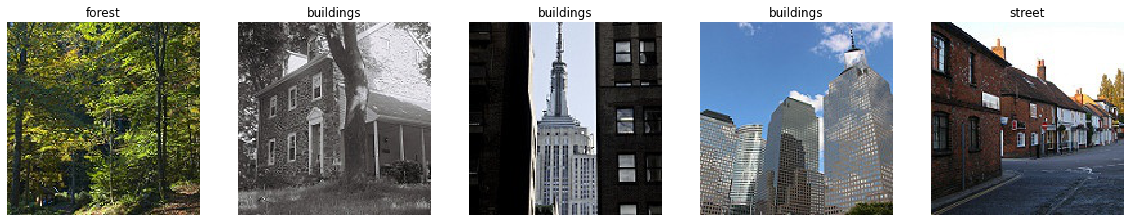

In [4]:
plt.figure(figsize=(20,20))

# Data used is a subset of the Intel Image Classification Dataset
# Each class has 400 images each
# This was done to make it easier to download the data and to upload when submitting
# When grading, you will need to change this directory
folder = "/content/drive/MyDrive/Colab Notebooks/Advanced Machine Learning/Datasets/IntelImageClassification"

for i in range(5):
  file = random.choice(os.listdir(folder))
  folderPath = os.path.join(folder, file)
  randImg = random.choice(os.listdir(folderPath))
  imgPath = os.path.join(folderPath, randImg)
  img = mpimg.imread(imgPath)
  ax = plt.subplot(1, 5, i+1)
  ax.title.set_text(file)
  plot_image(img)

In [5]:
X_full = []
class_name = []

for group in os.listdir(folder):
  for img in os.listdir(os.path.join(folder, group)):

    imgPath = os.path.join(folder, group, img)
    img = cv2.imread(imgPath, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224), interpolation = cv2.INTER_AREA)
    img = keras.applications.resnet50.preprocess_input(img)
    img = np.array(img)
    img = img.astype('float32')
    X_full.append(img)
    class_name.append(group)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'buildings'

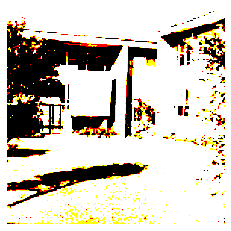

In [6]:
plot_image(X_full[50])
class_name[50]

In [7]:
target_dict = {k : v for v, k in enumerate(np.unique(class_name))}
target_dict

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [8]:
def get_key(val):
    for key, value in target_dict.items():
         if val == value:
             return key
 
    return "key doesn't exist"

In [9]:
y_full = [target_dict[class_name[i]] for i in range(len(class_name))]

In [10]:
print(y_full)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

#### Part B

Split it into a training set, a validation set, and a test set. (If you use the "flower data" from Chap 14, define the train/validation split (from the "non-test" dataset) through the  function train_test_split(X, y, random_state=num4). Set the random seed num4 to the last 4 digits of your student ID

In [11]:
X_train, X_complement, y_train, y_complement = train_test_split(X_full, y_full, train_size=.5, random_state=305)

X_valid, X_test, y_valid, y_test = train_test_split(X_complement, y_complement, train_size=.5, random_state=305)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


street


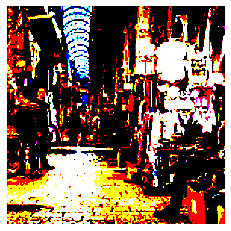

In [12]:
plot_image(X_train[0])
print(get_key(y_train[0]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


sea


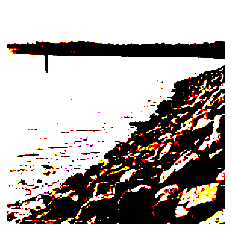

In [13]:
plot_image(X_valid[0])
print(get_key(y_valid[0]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


mountain


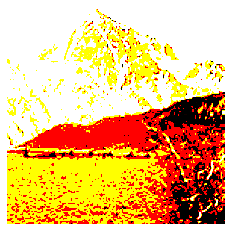

In [14]:
plot_image(X_test[0])
print(get_key(y_test[0]))

#### Part C

Build the input pipeline, including the appropriate preprocessing operations, and optionally add data augmentation

#### Part D

Fine-tune a pretrained model on this dataset

In [15]:
baseModel = keras.applications.resnet50.ResNet50(weights="imagenet", include_top = False)
avg = keras.layers.GlobalAveragePooling2D()(baseModel.output)
output = keras.layers.Dense(6, activation="softmax")(avg)
model = keras.models.Model(inputs=baseModel.input, outputs=output)

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
baseModel.summary()

In [17]:
batchSize = 32

In [18]:
for layer in baseModel.layers:
    layer.trainable = False

optimizer = keras.optimizers.SGD(learning_rate=0.2, momentum=0.9, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(x = np.array(X_train), y = np.array(y_train), epochs=5)

Epoch 1/5
38/38 [==============================] - 17s 111ms/step - loss: 9.9638 - accuracy: 0.7858
Epoch 2/5
38/38 [==============================] - 4s 99ms/step - loss: 4.2751 - accuracy: 0.9142
Epoch 3/5
38/38 [==============================] - 4s 99ms/step - loss: 1.8926 - accuracy: 0.9442
Epoch 4/5
35/38 [==========================>...] - ETA: 0s - loss: 1.3247 - accuracy: 0.9491

KeyboardInterrupt: ignored

I'm not sure why this model has such high accuracy or how it achieved such high accuracy so quickly. I'm not sure if I did something wrong or if this is suppoused to happen due to us using transfer learning. The model seems to make accurate predictions as seen in this next cell and the extra tests I do after

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'buildings'

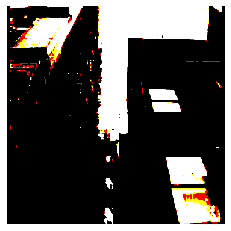

In [ ]:
imgNum = 7

plot_image(X_test[imgNum])

np.array(X_test[imgNum]).shape

index = model.predict(np.expand_dims(X_test[imgNum], axis=0))
get_key(np.argmax(index))

In [1]:
np.array(X_test[imgNum]).shape

NameError: ignored

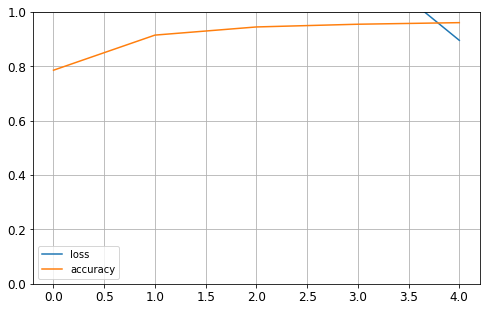

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

#### Testing model on images I found on Google images

In [ ]:
# You may have to change this directory when testing
folder = "/content/drive/MyDrive/Colab Notebooks/Advanced Machine Learning/Datasets/imageTests"

tests = []

for file in os.listdir(folder):
  imgPath = os.path.join(folder, file)
  img = cv2.imread(imgPath, cv2.COLOR_BGR2RGB)
  img = cv2.resize(img, (224, 224), interpolation = cv2.INTER_AREA)
  img = keras.applications.resnet50.preprocess_input(img)
  img = np.array(img)
  img = img.astype('float32')
  tests.append(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'buildings'

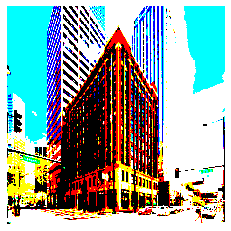

In [ ]:
plot_image(tests[0])
index = model.predict(np.expand_dims(tests[0], axis=0))
get_key(np.argmax(index))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'mountain'

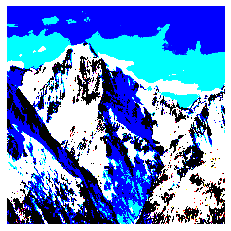

In [ ]:
plot_image(tests[1])
index = model.predict(np.expand_dims(tests[1], axis=0))
get_key(np.argmax(index))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'sea'

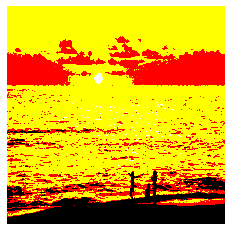

In [ ]:
plot_image(tests[2])
index = model.predict(np.expand_dims(tests[2], axis=0))
get_key(np.argmax(index))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'street'

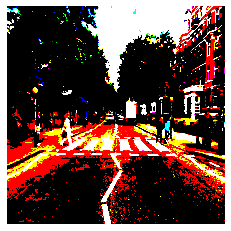

In [ ]:
plot_image(tests[3])
index = model.predict(np.expand_dims(tests[3], axis=0))
get_key(np.argmax(index))